In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
""" for k in range(0,1):
    mpl.rcParams["axes.labelsize"] = fs
    mpl.rcParams["axes.titlesize"] = fs
    mpl.rcParams["xtick.labelsize"] =  fs
    mpl.rcParams["ytick.labelsize"] =  fs
    mpl.rcParams["legend.fontsize"] =  fs
    mpl.rcParams['font.sans-serif'] = ['Times New Roman']
    mpl.rcParams['font.serif'] = ['Times New Roman']
    mpl.rcParams['axes.unicode_minus'] = False """

import openpyxl

In [9]:
font = {'family' : 'Times New Roman',
        #'weight' : 'bold',
        'size'   : 15}
mpl.rc('font', **font)

In [3]:
model_dfn = pb.lithium_ion.DFN()
sim_dfn = pb.Simulation(model_dfn)
sol = sim_dfn.solve([0, 3600])

In [10]:
dir(quick_plot)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'axes',
 'axis_limits',
 'colorbars',
 'colors',
 'create_gif',
 'dynamic_plot',
 'fig',
 'figsize',
 'first_dimensional_spatial_variable',
 'get_spatial_var',
 'gridspec',
 'is_y_z',
 'labels',
 'linestyles',
 'max_t',
 'min_t',
 'n_cols',
 'n_rows',
 'plot',
 'plots',
 'reset_axis',
 'second_dimensional_spatial_variable',
 'set_output_variables',
 'slider_update',
 'spatial_factor',
 'spatial_unit',
 'spatial_variable_dict',
 'subplot_positions',
 'time_lines',
 'time_scaling_factor',
 'time_unit',
 'ts_seconds',
 'variable_limits',
 'variables',
 'x_first_and_y_second']

In [10]:
label = ["0",] 
output_variables3 = [
                "Electrolyte potential [V]",
                "Positive electrode potential [V]",
                "Negative electrode potential [V]",
                "Positive current collector potential [V]", 
                "Terminal voltage [V]", 
            ]
quick_plot = pb.QuickPlot(
    [sol,], output_variables3,label,variable_limits='fixed',
    time_unit='hours',n_rows=2) #figsize = (18,12),
quick_plot.reset_axis()
quick_plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [20]:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2R5/'; 
Target  = 'Produce_gif/'
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target);
output_filename = BasicPath + Target + '/Test1.gif'

quick_plot.create_gif(
    number_of_images=10, duration=1,output_filename=output_filename)

In [16]:
print(output_filename)

D:/OneDrive - Imperial College London/SimDataSave/P2R5/Produce_gif//Test1.gif


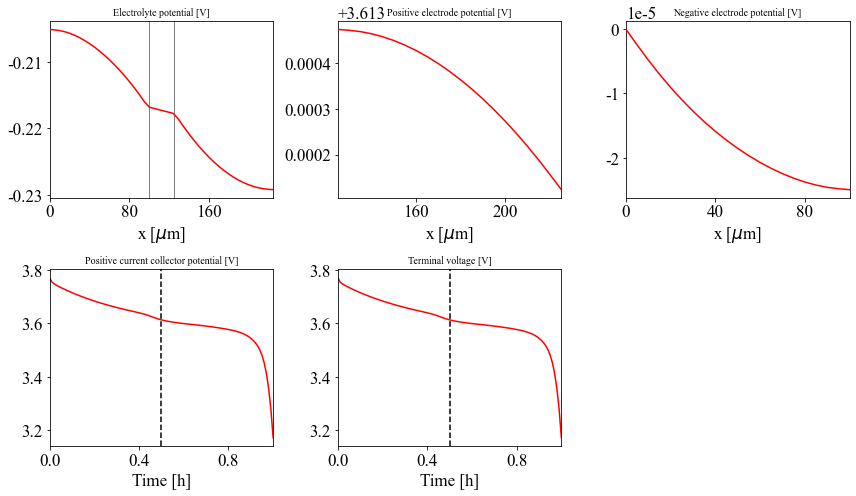

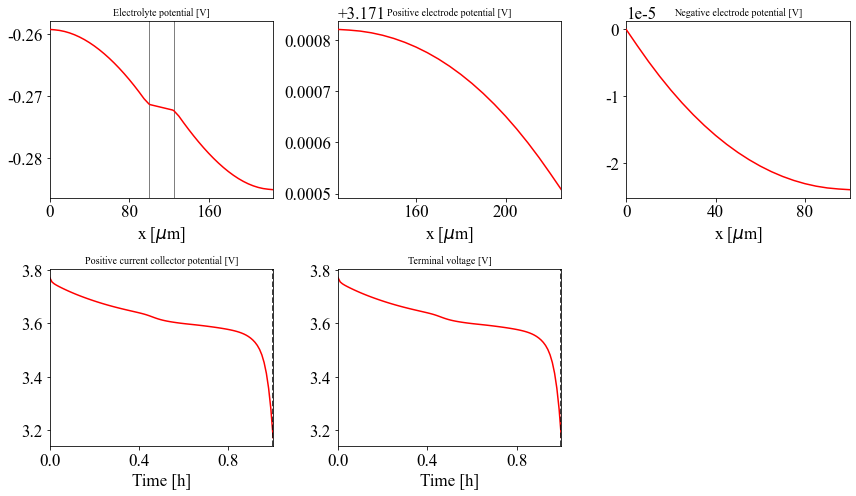

In [14]:
quick_plot.plot(0.5)
quick_plot.plot(1)

In [4]:
sim_dfn.plot(output_variables=output_variables3)


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [7]:
sim_dfn.create_gif(
    number_of_images=5, duration=0.2)

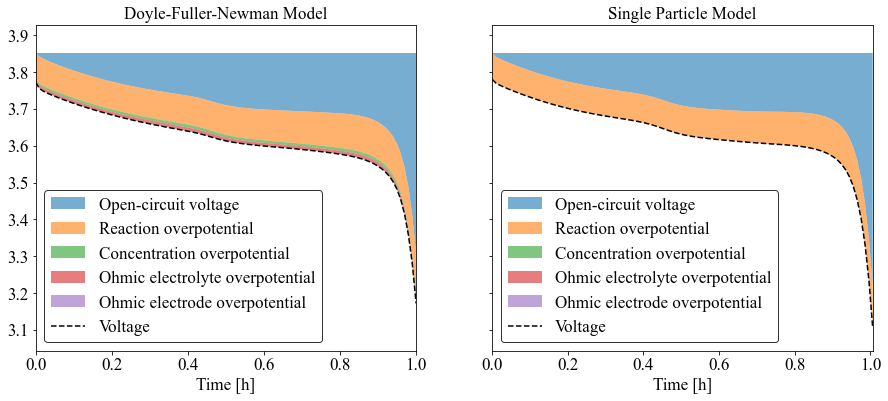

In [5]:
model_spm = pb.lithium_ion.SPM()
sim_spm = pb.Simulation(model_spm)
sim_spm.solve([0, 3700])

# comparing voltage components for Doyle-Fuller-Newman model and Single Particle Model
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

pb.plot_voltage_components(sim_dfn.solution, ax=axes.flat[0])
pb.plot_voltage_components(sim_spm.solution, ax=axes.flat[1])

axes.flat[0].set_title("Doyle-Fuller-Newman Model")
axes.flat[1].set_title("Single Particle Model")

plt.show()

In [ ]:
from pybamm import exp, constants, Parameter
def nmc_LGM50_electrolyte_exchange_current_density_ORegan2021_adjust(c_e, c_s_surf, T):
    i_ref = 5.028  # (A/m2)
    alpha = 0.43
    E_r = 2.401e4
    arrhenius = exp(E_r / constants.R * (1 / 298.15 - 1 / T))
    c_p_max = Parameter("Maximum concentration in positive electrode [mol.m-3]")
    c_e_ref = Parameter("Typical electrolyte concentration [mol.m-3]")
    return (
        i_ref
        * arrhenius
        * (c_e / c_e_ref) ** (1 - alpha)
        * (c_s_surf / c_p_max) ** alpha
        * (1 - c_s_surf / c_p_max) ** (1 - alpha))

def nmc_LGM50_diffusivity_ORegan2021_adjust(sto, T):
    a1 = -0.9231
    a2 = -0.4066
    a3 = -0.993
    b1 = 0.3216
    b2 = 0.4532
    b3 = 0.8098
    c0 = -13.96
    c1 = 0.002534
    c2 = 0.003926
    c3 = 0.09924
    d = 1449

    D_ref = (
        10
        ** (
            c0
            + a1 * exp(-((sto - b1) ** 2) / c1)
            + a2 * exp(-((sto - b2) ** 2) / c2)
            + a3 * exp(-((sto - b3) ** 2) / c3)
        )
        * 10  # correcting factor (see O'Regan et al 2021), mark Ruihe change from 2.7 to 10
    )

    E_D_s = d * constants.R
    arrhenius = exp(E_D_s / constants.R * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius

def graphite_LGM50_diffusivity_ORegan2021_adjust(sto, T):
    a0 = 11.17
    a1 = -1.553
    a2 = -6.136
    a3 = -9.725
    a4 = 1.85
    b1 = 0.2031
    b2 = 0.5375
    b3 = 0.9144
    b4 = 0.5953
    c0 = -15.11
    c1 = 0.0006091
    c2 = 0.06438
    c3 = 0.0578
    c4 = 0.001356
    d = 2092

    D_ref = (
        10
        ** (
            a0 * sto
            + c0
            + a1 * exp(-((sto - b1) ** 2) / c1)
            + a2 * exp(-((sto - b2) ** 2) / c2)
            + a3 * exp(-((sto - b3) ** 2) / c3)
            + a4 * exp(-((sto - b4) ** 2) / c4)
        )
        * 20  # correcting factor (see O'Regan et al 2021) mark: Ruihe change from 3.0321 
    )

    E_D_s = d * constants.R
    arrhenius = exp(E_D_s / constants.R * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius

def graphite_LGM50_electrolyte_exchange_current_density_ORegan2021_adjust(c_e, c_s_surf, T):
    i_ref = 12.4  # (A/m2) replaced with value from Schmalstieg et al. (2018), from 2.668 
    alpha = 0.792
    E_r = 4e4
    arrhenius = exp(E_r / constants.R * (1 / 298.15 - 1 / T))

    c_n_max = Parameter("Maximum concentration in negative electrode [mol.m-3]")
    c_e_ref = Parameter("Typical electrolyte concentration [mol.m-3]")

    return (
        i_ref
        * arrhenius
        * (c_e / c_e_ref) ** (1 - alpha)
        * (c_s_surf / c_n_max) ** alpha
        * (1 - c_s_surf / c_n_max) ** (1 - alpha))

def nmc_LGM50_electronic_conductivity_ORegan2021_adjust(T):
    E_r = 3.5e3
    arrhenius = exp(E_r / constants.R * (1 / 298.15 - 1 / T))

    sigma = 0.8473 * arrhenius

    return sigma


In [ ]:
# Test this branch - Coupled_RioP2 newly created from Simon's develop branch
# Run without dry-out model
V_max = 4.2;        V_min = 2.5;   Temper_RPT = 25; 
Total_Cycles = 10; save_at_cycles = 1;  
for i in range(0,1):  # Key scan parameters:
    Diff_SEI_i = 1.7e-20; 
    R_SEI_i = 2E5;   Bulk_Sol_Con_i = 4541.0;
    D_Li_inSEI_i = 1e-22;    # default: 1e-20 
    c_Li_inte_ref_i = 15;    # default: 15
    Diff_EC_i   = 2e-20;       k_SEI_i   = 1e-16;
    LAMcr_prop_i=2.7778e-09;   Crack_rate_i=3.9e-20; 
    Couple_SEI_LiP_i = 1e-6; # default: 1e-6
    k_LiP_i = 1E-10;         # default: 1e-10
    Temper = 25;
    mesh_par = 120;

Experiment_0   = pb.Experiment(["Discharge at 1 C for 0.5 h", ]   )  
Experiment_Breakin= pb.Experiment( [
    ( f"Discharge at 0.1C until {V_min} V",  
    "Rest for 6 hours",  
    f"Charge at 0.1C until {V_max} V" )  ] *2 )
Experiment_Long   = pb.Experiment(  
    [(f"Discharge at 1 C until {V_min} V", 
    f"Charge at 0.3 C until {V_max} V", 
    f"Hold at {V_max} V until C/100"),  
    ] * Total_Cycles  )          
for i in range(0,1):  
    ChemistryChen=pb.parameter_sets.OKane2022   
    #ChemistryChen["electrolyte"] = "lipf6_Valoen2005"
    Para_0=pb.ParameterValues(chemistry=ChemistryChen)
    # DFN parameter
    Para_0.update({"Upper voltage cut-off [V]": 4.21})
    Para_0.update({"Lower voltage cut-off [V]": 2.49})
    Para_0.update({"Negative electrode diffusivity [m2.s-1]": 2e-14})
    Para_0.update({"Positive electrode diffusivity [m2.s-1]": 1e-14})
    # general SEI
    Para_0.update({'SEI resistivity [Ohm.m]':R_SEI_i}) ;
    # solvent-diffusion limited
    Para_0.update({'Outer SEI solvent diffusivity [m2.s-1]':Diff_SEI_i});
    Para_0.update({'Bulk solvent concentration [mol.m-3]':Bulk_Sol_Con_i});
    # interstitial-diffusion limited
    Para_0.update({'Inner SEI lithium interstitial diffusivity [m2.s-1]':D_Li_inSEI_i})       
    Para_0.update({'Lithium interstitial reference concentration [mol.m-3]':c_Li_inte_ref_i}) 
    # ec-reaction limited
    Para_0.update({'EC diffusivity [m2.s-1]':Diff_EC_i}) 
    Para_0.update({'SEI kinetic rate constant [m.s-1]':k_SEI_i}) 
    Para_0.update({'EC initial concentration in electrolyte [mol.m-3]':Bulk_Sol_Con_i}) 
    # LiP and coupling with SEI:
    Para_0.update({"Dead lithium decay constant [s-1]": Couple_SEI_LiP_i})   
    Para_0.update({'Lithium plating kinetic rate constant [m.s-1]':k_LiP_i})  
    # Crack model
    Para_0.update({"Negative electrode LAM constant proportional term [s-1]": LAMcr_prop_i})
    Para_0.update({"Positive electrode LAM constant proportional term [s-1]": LAMcr_prop_i})  
    # make it simple for now, but may want to have T dependency in the future
    Para_0.update({"Negative electrode cracking rate": Crack_rate_i})
    Para_0.update({"Positive electrode cracking rate": Crack_rate_i})
    Para_0.update({"Negative electrode volume change": 0.0})
    Para_0.update({"Positive electrode volume change": 0.0}) 
    Model_0 = pb.lithium_ion.DFN(     
        options={
            "particle": "Fickian diffusion",          
            "SEI":"solvent-diffusion limited",   
            "SEI on cracks":"true",  
            "SEI film resistance":"distributed",          
            "SEI porosity change":"true",      
            "particle mechanics":"swelling and cracking",  
            "loss of active material":"stress-driven", 
            "lithium plating":"partially reversible"      
            } ) #
    var = pb.standard_spatial_vars  
    var_pts = {
        var.x_n: 20,  
        var.x_s: 10,  
        var.x_p: 20,  
        var.r_n: mesh_par,  
        var.r_p: mesh_par,  }

In [ ]:
# Run break-in cycle step by step:

Experiment_Breakin_0 = pb.Experiment( [
    ( f"Discharge at 0.1C until {V_min} V",  
    "Rest for 1 hours",  
    f"Charge at 0.1C until {V_max} V" )  ] *2 )
# Run 1st cycle
Sim_Breakin_0    = pb.Simulation(
    Model_0,        experiment = Experiment_Breakin_0,
    parameter_values = Para_0,
    solver = pb.CasadiSolver(),
    var_pts=var_pts,
    ) 
Sol_Breakin_0    = Sim_Breakin_0.solve(calc_esoh=False)

In [ ]:
Experiment_Breakin_1 = pb.Experiment( [
    ( f"Discharge at 0.1C until {V_min} V",  )  ] *1 )
# Run 2nd cycle - diacharge
Model_Breakin_1 = Model_0.set_initial_conditions_from(Sol_Breakin_0, inplace=False)

Sim_Breakin_1    = pb.Simulation(
    Model_Breakin_1,        experiment = Experiment_Breakin_1,
    parameter_values = Para_0,
    solver = pb.CasadiSolver(),
    var_pts=var_pts,
    ) 
Sol_Breakin_1    = Sim_Breakin_1.solve(calc_esoh=False)

In [ ]:
# Run 2nd cycle - rest 1h
Experiment_Breakin_2 = pb.Experiment( [
    ( "Rest for 1 hour",  )  ] *1 )

Model_Breakin_2 = Model_Breakin_1.set_initial_conditions_from(Sol_Breakin_1, inplace=False)

Sim_Breakin_2    = pb.Simulation(
    Model_Breakin_2,        experiment = Experiment_Breakin_2,
    parameter_values = Para_0,
    solver = pb.CasadiSolver(),
    var_pts=var_pts,
    ) 
Sol_Breakin_2    = Sim_Breakin_2.solve(calc_esoh=False)


In [ ]:
Experiment_Breakin_3 = pb.Experiment( [
    ( "Rest for 2 min",  )  ] *1 )
Model_Breakin_3 = Model_Breakin_2.set_initial_conditions_from(Sol_Breakin_2, inplace=False)

Sim_Breakin_3    = pb.Simulation(
    Model_Breakin_3,        experiment = Experiment_Breakin_3,
    parameter_values = Para_0,
    solver = pb.CasadiSolver(),
    var_pts=var_pts,
    ) 
Sol_Breakin_3    = Sim_Breakin_3.solve(calc_esoh=False)


In [ ]:
print(Sol_Breakin_3["Terminal voltage [V]"].entries)
print(Sol_Breakin_2["Terminal voltage [V]"].entries)

In [ ]:
label = ["0","1"] 
output_variables3 = [
                "Electrolyte potential [V]",
                "Positive electrode potential [V]",
                "Negative electrode potential [V]",
                "Positive current collector potential [V]", 
                "Terminal voltage [V]", 
            ]
quick_plot = pb.QuickPlot([Sol_Breakin_0,Sol_Breakin_1], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:
print(Sol_Breakin_1["Negative particle concentration"].entries)

In [ ]:
label = ["3","4"] 
output_variables3 = [
                "Minimum positive particle concentration",
                "Minimum negative particle concentration",
                "Maximum positive particle concentration",
                "Maximum negative particle concentration",
                "Maximum positive particle surface concentration",
                "Maximum negative particle surface concentration",
            ]
quick_plot = pb.QuickPlot([Sol_Breakin_3,Sol_Breakin_4], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:
label = ["3","4"] 
output_variables3 = [
                "Positive particle surface concentration",
                "Negative particle surface concentration",
                "X-averaged electrolyte potential",
                "X-averaged electrolyte potential [V]"
            ]
quick_plot = pb.QuickPlot([Sol_Breakin_3,Sol_Breakin_4], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:
Experiment_Breakin_4 = pb.Experiment( [
    ( "Rest for 240 s",  )  ] *1 )
Model_Breakin_4 = Model_Breakin_3.set_initial_conditions_from(Sol_Breakin_3, inplace=False)

Sim_Breakin_4    = pb.Simulation(
    Model_Breakin_4,        experiment = Experiment_Breakin_4,
    parameter_values = Para_0,
    solver = pb.CasadiSolver(dt_max=0.5),
    var_pts=var_pts,
    ) 
Sol_Breakin_4    = Sim_Breakin_4.solve(calc_esoh=False)


In [ ]:
Model_0.variables.search("Loss of capacity")

In [ ]:
label = ["3", "4"] 
output_variables3 = [
                "Negative electrode roughness ratio",
                "Positive electrode roughness ratio",
                "Total SEI on cracks thickness [m]",
                "X-averaged total SEI on cracks thickness [m]", 
                "X-averaged negative electrode roughness ratio",
                "Negative electrode capacity [A.h]",
                "Positive electrode capacity [A.h]",
            ]
quick_plot = pb.QuickPlot([Sol_Breakin_3,Sol_Breakin_4], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:
label = ["2", "3"] 
output_variables3 = [
    "Loss of capacity to SEI [A.h]",
    "Loss of capacity to dead lithium plating [A.h]",
    "Loss of capacity to lithium plating [A.h]",
    "Loss of capacity to SEI on cracks [A.h]",
    ]
quick_plot = pb.QuickPlot([Sol_Breakin_2,Sol_Breakin_3], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:
label = ["Sol_0","Sol_1"] 
output_variables3 = [
                "Discharge capacity [A.h]", 
                "Negative electrode SOC",
                "Positive electrode SOC",
                "Electrolyte potential [V]",
                "Negative particle surface concentration [mol.m-3]",
                "Terminal voltage [V]",
                "SEI interfacial current density [A.m-2]",
                "Porosity"
            ]
quick_plot = pb.QuickPlot([Sol_0,Sol_1], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:
label = ["Diff_Li_SEI = 1e-18","Diff_Li_SEI = 1e-16"] 
output_variables3 = [
                "Discharge capacity [A.h]", 
                "Negative electrode SOC",
                "Positive electrode SOC",
                "Electrolyte potential [V]",
                "Negative particle surface concentration [mol.m-3]",
                "Terminal voltage [V]",
                "SEI interfacial current density [A.m-2]",
                "Porosity"
            ]
quick_plot = pb.QuickPlot([Sol_0,Sol_1], output_variables3,label,variable_limits='tight') #     
quick_plot.dynamic_plot();

In [ ]:

Cap  =Sol_0["Discharge capacity [A.h]"].entries

Time =Sol_0["Time [h]"].entries
NegSoc=Sol_0["Negative electrode SOC"].entries
PosSoc=Sol_0["Positive electrode SOC"].entries


Num_subplot = 2; fs=19
fig, axs = plt.subplots(1,2, figsize=(14,5),tight_layout=True)
axs[0].plot(Time,Cap, '-', label="Cap" ) # first cycle
axs[1].plot(Time,NegSoc, '-',label="Neg" ) # last cycle
axs[1].plot(Time,PosSoc, '-',label="Pos" ) # last cycle
axs[0].set_ylabel("Discharge cap [A.h]",   fontdict={'family':'Times New Roman','size':fs})
axs[1].set_ylabel("SOC",   fontdict={'family':'Times New Roman','size':fs})
for i in range(0,Num_subplot):    
    axs[i].set_xlabel("Time [h]",   fontdict={'family':'Times New Roman','size':fs})
    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('Times New Roman') for label in labels]
    axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[i].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)  

axs[0].set_title(f"Discharge capacity", fontdict={'family':'Times New Roman','size':fs+1})
axs[1].set_title(f"Electrode SOC", fontdict={'family':'Times New Roman','size':fs+1})

In [ ]:

plt.plot(Time,NegSoc)
plt.plot(Time,PosSoc)

In [ ]:
Experiment_Long_1   = pb.Experiment(  
    [(
        f"Discharge at 1 C until {V_min} V", 
        f"Charge at 0.3 C until {V_max} V", 
        f"Hold at {V_max} V until C/100"),  ] * 6  )  
Model_1= Model_0.set_initial_conditions_from(Sol_0, inplace=False)
Sim_1    = pb.Simulation(
    Model_1,        experiment = Experiment_Long_1,
    parameter_values = Para_0,
    solver = pb.CasadiSolver(),
    var_pts=var_pts,
    ) #mode="safe"
Sol_1    = Sim_1.solve()

In [ ]:
V_max = 4.2;        V_min = 2.5;   Temper_RPT = 25; 

#index 
ModelTimer = pb.Timer()
Total_Cycles = 16; save_at_cycles = 1;  

# Key scan parameters:
Ratio_excess_i = 1.04;
cs_Neg_Init_i = 28866 ; Diff_SEI_i = 1.7e-20; # Ruihe old: 28920  
R_SEI_i = 2E5;   Bulk_Sol_Con_i = 4541.0;
D_Li_inSEI_i = 3e-21;    # default: 1e-20 
c_Li_inte_ref_i = 15;    # default: 15
Couple_SEI_LiP_i = 1e-6; # default: 1e-6
k_LiP_i = 1E-10;         # default: 1e-10
Temper = 25;

Experiment_Long   = pb.Experiment(  
    [(
        f"Discharge at 1 C until {V_min} V", 
        f"Charge at 0.3 C until {V_max} V", 
        f"Hold at {V_max} V until C/100"),  ] * Total_Cycles  )  
        
for i in range(0,1):    ######################   update parameter and run first RPT
    ChemistryChen=pb.parameter_sets.Chen2020_coupled   
    ChemistryChen["electrolyte"] = "lipf6_Valoen2005"
    Para_0=pb.ParameterValues(chemistry=ChemistryChen)
    Para_0.update({"Negative electrode diffusivity [m2.s-1]": graphite_LGM50_diffusivity_ORegan2021_adjust})
    Para_0.update({"Positive electrode diffusivity [m2.s-1]": nmc_LGM50_diffusivity_ORegan2021_adjust})
    Para_0.update({"Negative electrode exchange-current density [A.m-2]": 
        graphite_LGM50_electrolyte_exchange_current_density_ORegan2021_adjust})
    Para_0.update({"Positive electrode exchange-current density [A.m-2]": 
        nmc_LGM50_electrolyte_exchange_current_density_ORegan2021_adjust})
    Para_0.update({"Positive electrode conductivity [S.m-1]": 
        0.8473})
    Para_0.update({"Negative electrode Bruggeman coefficient (electrode)": 
        0.0})
    #Para_0.update({'Initial concentration in negative electrode [mol.m-3]':cs_Neg_Init_i })
    #Para_0.update({'Initial concentration in positive electrode [mol.m-3]':13975 })  
    Para_0.update({'SEI resistivity [Ohm.m]':R_SEI_i}) ;
    Para_0.update({'Outer SEI solvent diffusivity [m2.s-1]':Diff_SEI_i});
    Para_0.update({'Bulk solvent concentration [mol.m-3]':Bulk_Sol_Con_i});
    Para_0.update({'Initial electrolyte excessive amount ratio':Ratio_excess_i})   # 
    Para_0.update({'Inner SEI lithium interstitial diffusivity [m2.s-1]':D_Li_inSEI_i})       
    Para_0.update({'Lithium interstitial reference concentration [mol.m-3]':c_Li_inte_ref_i}) 
    Para_0.update({"SEI-plating coupling constant [s-1]": Couple_SEI_LiP_i})     
    Para_0.update({'Lithium plating kinetic rate constant [m.s-1]':k_LiP_i})                
    Para_0.update({'Current solvent concentration in the reservoir [mol.m-3]':Bulk_Sol_Con_i})     
    Para_0.update({'Current electrolyte concentration in the reservoir [mol.m-3]':1000.0})           
    Para_0.update({'Ratio of Li-ion concentration change in electrolyte consider solvent consumption':  
                    1.0 })
    Model_11 = pb.lithium_ion.DFN(     
    options={
        "particle": "Fickian diffusion",          
        "SEI":"solvent-diffusion limited",          
        "SEI film resistance":"distributed",          
        "SEI porosity change":"true",         
        "lithium plating":"partially reversible"     } ) #
    ModelTimer = pb.Timer()
    mesh_neg = 50; mesh_pos = 50; 
    var = pb.standard_spatial_vars  
    var_pts = {var.x_n: 20,  var.x_s: 10,  var.x_p: 20,  var.r_n: mesh_neg,  var.r_p: mesh_pos,  }
    Sim_11    = pb.Simulation(
        Model_11,        experiment = Experiment_Long,
        parameter_values = Para_0,
        solver = pb.CasadiSolver(),
        var_pts=var_pts,
        ) #mode="safe"
    Sol_11    = Sim_11.solve()

In [ ]:
Experiment_Long_6   = pb.Experiment(  
    [(
        f"Discharge at 1 C for 3928 s", ), ] * 1  ) 
Model_6= Model_0.set_initial_conditions_from(Sol_0, inplace=False)
Sim_6 = pb.Simulation(
        Model_6,
        experiment = Experiment_Long_6, 
        parameter_values=Para_0, 
        solver = pb.CasadiSolver(),
        #var_pts=var_pts,
    )
Sol_6 = Sim_6.solve() 

In [ ]:
Para_0.update({"Negative electrode Bruggeman coefficient (electrode)": 
        0.0})
def nmc_LGM50_diffusivity_ORegan2021_adjust_2(sto, T):
    a1 = -0.9231
    a2 = -0.4066
    a3 = -0.993
    b1 = 0.3216
    b2 = 0.4532
    b3 = 0.8098
    c0 = -13.96
    c1 = 0.002534
    c2 = 0.003926
    c3 = 0.09924
    d = 1449

    D_ref = (
        10
        ** (
            c0
            + a1 * exp(-((sto - b1) ** 2) / c1)
            + a2 * exp(-((sto - b2) ** 2) / c2)
            + a3 * exp(-((sto - b3) ** 2) / c3)
        )
        * 10  # correcting factor (see O'Regan et al 2021)
    )

    E_D_s = d * constants.R
    arrhenius = exp(E_D_s / constants.R * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius
    
Para_0.update({"Positive electrode diffusivity [m2.s-1]": 
        nmc_LGM50_diffusivity_ORegan2021_adjust_2})

Experiment_Long_7   = pb.Experiment(  
    [(
        f"Discharge at 1 C for 3929 s", ), ] * 1  ) 
Model_7= Model_0.set_initial_conditions_from(Sol_0, inplace=False)
Sim_7 = pb.Simulation(
        Model_7,
        experiment = Experiment_Long_7, 
        parameter_values=Para_0, 
        solver = pb.CasadiSolver(),
        #var_pts=var_pts,
    )
Sol_7 = Sim_7.solve() 

In [ ]:
# Now we have: Sol_6 (dis 3928) Sol_5 (dis 3900) Sol_4 (dis 3928) Sol_0 (normal 5 cycles)